After [Topological Data Analysis of Financial Time Series:Landscapes of Crashes](https://arxiv.org/pdf/1703.04385.pdf) : using tools for persistent homology (in particular persistence landscapes, a way to embed persistence diagrams in a Banach space) to create robust predictors of crash or regime transition times.

Example on financial data : S&P 500 and EuroStoxx sectorial returns from the 1990s to nowadays.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from persistence_crash_detection import *

plt.style.use('dark_background')

In [2]:
WINDOW = 100
LENGTH_MAX = 2.0
RESOLUTION = 100
NBLD = 3
DIM_MAX = 1

p = 2

In [3]:
xl_SP500 = pd.ExcelFile("S&P_500_sectors_clean.xlsx")
xl_EURO = pd.ExcelFile("Euro_Stoxx_sectors_clean.xlsx")

df_SP500 = pd.read_excel(xl_SP500, sheet_name = 1)
df_EURO = pd.read_excel(xl_EURO, sheet_name = 1)

date_SP500 = df_SP500['Date']
df_SP500 = df_SP500.set_index('Date')

df_EURO = df_EURO[~df_EURO.Date.isnull()]
df_EURO = df_EURO.iloc[0:-1]
date_EURO = df_EURO['Date']
df_EURO = df_EURO.set_index('Date')

START_DATE = datetime(1993, 1, 23)
END_DATE = datetime(2016, 1, 23)

df_SP500 = df_SP500[df_SP500.index>=START_DATE].dropna(axis=1)
df_SP500 = df_SP500[df_SP500.index<=END_DATE].dropna(axis=1)
df_EURO = df_EURO[df_EURO.index>=START_DATE].dropna(axis=1)
df_EURO = df_EURO[df_EURO.index<=END_DATE].dropna(axis=1)

df_SP500_index = df_SP500['SPX Index']
df_SP500 = df_SP500.drop('SPX Index', axis=1)

df_EURO_index = df_EURO['SXXT Index']
df_EURO = df_EURO.drop('SXXT Index', axis=1)

ts_SP500 = np.array(df_SP500_index.index)[1:]
ts_EURO = np.array(df_EURO_index.index)[1:]

### S&P 500

In [4]:
data = np.array((np.log(df_SP500/df_SP500.shift(1))).dropna()).T

In [5]:
n = data.shape[1]

norm_series = np.empty((n, DIM_MAX+1))

for t in range(n):
    for dim in range(DIM_MAX+1):
        L, x = landscape_at_t(data, 
                              t, 
                              window=WINDOW,
                              dim=dim,
                              nbld=NBLD, 
                              resolution=RESOLUTION, 
                              length_max=LENGTH_MAX,
                             )

        norm_series[t, dim] = np.linalg.norm(trapz(L), ord=p)

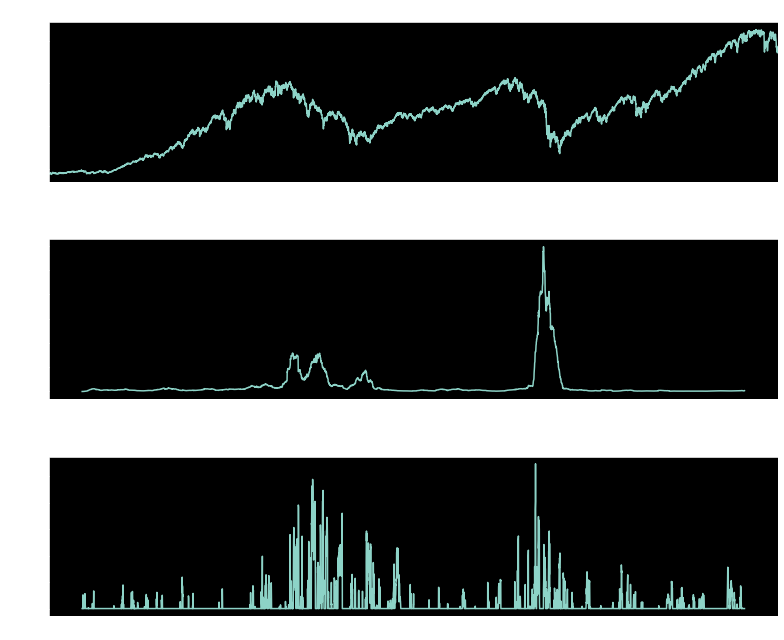

In [6]:
fig, axes = plt.subplots(figsize=(11, 9), nrows=DIM_MAX+2, ncols=1)

ax = axes[0]
df_SP500_index.plot(kind='line', ax=ax)
ax.set_title('S&P 500')

for i in range(DIM_MAX+1):
    ax = axes[i+1]
    ax.plot(ts_SP500, norm_series[:, i])
    ax.set_title('{}-norm of the integrated {}-persistence landscapes through time'.format(p, dim))
plt.tight_layout()
plt.show()

In [7]:
data = np.array((np.log(df_EURO/df_EURO.shift(1))).dropna()).T

In [8]:
n = data.shape[1]

norm_series = np.empty((n, DIM_MAX+1))

for t in range(n):
    for dim in range(DIM_MAX+1):
        L, x = landscape_at_t(data, 
                              t, 
                              window=WINDOW,
                              dim=dim,
                              nbld=NBLD, 
                              resolution=RESOLUTION, 
                              length_max=LENGTH_MAX,
                             )

        norm_series[t, dim] = np.linalg.norm(trapz(L), ord=p)

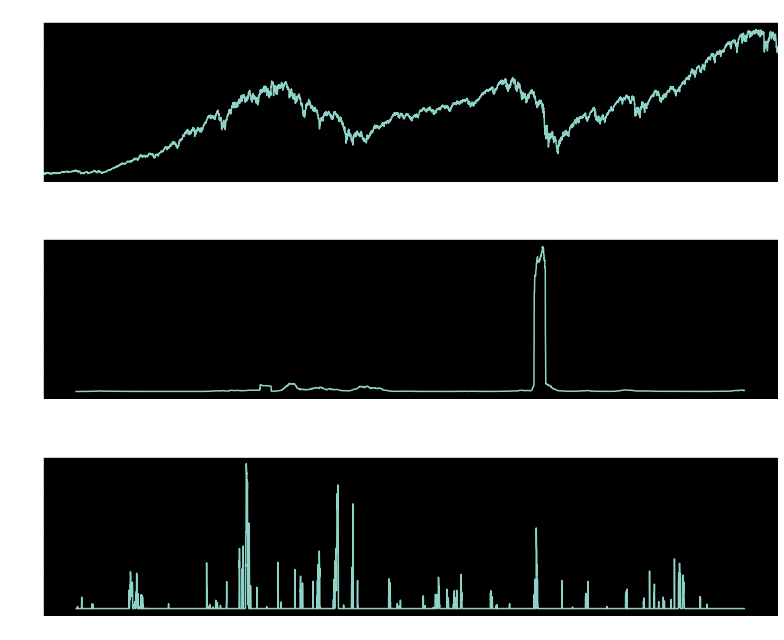

In [9]:
fig, axes = plt.subplots(figsize=(11, 9), nrows=DIM_MAX+2, ncols=1)

ax = axes[0]
df_SP500_index.plot(kind='line', ax=ax)
ax.set_title('EuroStoxx')

for i in range(DIM_MAX+1):
    ax = axes[i+1]
    ax.plot(ts_EURO, norm_series[:, i])
    ax.set_title('{}-norm of the integrated {}-persistence landscapes through time'.format(p, dim))
plt.tight_layout()
plt.show()